<a href="https://colab.research.google.com/github/lakshayae162/Project-1/blob/main/Lung_Cancer_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading images from class directory: Normal cases
Reading images from class directory: Malignant cases
Reading images from class directory: Bengin cases
Train Accuracy: 1.0
Test Accuracy: 0.9927272727272727


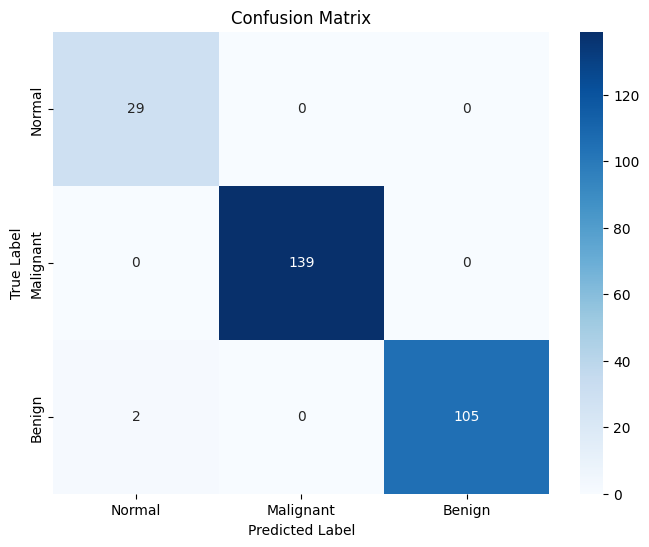

In [3]:
import os
import numpy as np
from PIL import Image
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
dataset_path = '/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset'
input_shape = (128, 128)  # Only width and height needed for SVM
class_names = ['Normal', 'Malignant', 'Benign']
class_mapping = {class_name: index for index, class_name in enumerate(class_names)}

# Load and preprocess images
images = []
labels = []

for class_dir in os.listdir(dataset_path):
    class_dir_path = os.path.join(dataset_path, class_dir)
    if os.path.isdir(class_dir_path):
        print(f"Reading images from class directory: {class_dir}")
        for image_file in os.listdir(class_dir_path):
            image_path = os.path.join(class_dir_path, image_file)
            try:
                with Image.open(image_path) as img:
                    img = img.resize(input_shape)
                    img = np.array(img)
                    if img.shape == (*input_shape, 3):  # Ensure 3 channels
                        img = img.flatten()  # Flatten the image for SVM
                        images.append(img)
                        labels.append(class_dir)  # Folder names are class labels
                    else:
                        print(f"Image {image_path} skipped due to shape mismatch.")
            except Exception as e:
                print(f"Error reading image {image_path}: {e}")

images = np.array(images, dtype=np.float32) / 255.0  # Normalize image data to 0-1

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.25, random_state=42)

# Standardize data
scaler = StandardScaler()
train_images = scaler.fit_transform(train_images)
test_images = scaler.transform(test_images)

# Define and train SVM model
svm_model = SVC(kernel='linear', probability=True)  # Use 'linear' or 'rbf' kernel
svm_model.fit(train_images, train_labels)

# Evaluate the model
train_predictions = svm_model.predict(train_images)
test_predictions = svm_model.predict(test_images)

train_accuracy = accuracy_score(train_labels, train_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

# Confusion Matrix
cm = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
